In [1]:
import numpy as np
import pandas as pd
import pygmo
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
 
    
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib 
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

C:\Users\jiahang.zhong\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('training_data_randn.csv')
cols_x = ['nPurchases', 'nPurchasesDiscount', 'AvgPrice', 'AvgService', 'AvgDiscount', 'CLV', 'Service', 'RRP', 'Discount']
col_y = 'is_deal'
col_p = 'Probability'
print(df.shape)

(1000000, 22)


In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
x_c0,0.457503,0.527623,0.432631,0.352157,0.540471,0.328500,0.462935,3.655688e-01,0.607577,0.664356
x_c1,0.556702,0.391260,0.511365,0.552499,0.557705,0.396073,0.384211,5.844885e-01,0.489095,0.353061
nPurchases,0.000000,5.000000,2.000000,3.000000,2.000000,1.000000,0.000000,9.000000e+00,0.000000,1.000000
AvgPrice,1370.000000,580.000000,1730.000000,1570.000000,2220.000000,1190.000000,1870.000000,5.700000e+02,1230.000000,1880.000000
AvgService,690.000000,310.000000,1180.000000,190.000000,720.000000,260.000000,450.000000,2.700000e+02,150.000000,840.000000
nPurchasesDiscount,0.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,5.000000e+00,0.000000,1.000000
AvgDiscount,93.000000,61.000000,104.000000,156.000000,238.000000,121.000000,162.000000,7.900000e+01,137.000000,136.000000
CLV,5600.000000,3900.000000,10100.000000,5600.000000,9800.000000,5100.000000,6700.000000,3.900000e+03,4300.000000,8900.000000
customer_id,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000e+00,8.000000,9.000000
product_id,1.000000,4.000000,1.000000,0.000000,4.000000,1.000000,2.000000,2.000000e+00,0.000000,1.000000


In [4]:
df.describe()

,x_c0,x_c1,nPurchases,AvgPrice,AvgService,nPurchasesDiscount,AvgDiscount,CLV,customer_id,product_id,...,Service,Cost,Discount,BaseProb,D_Scale_exp,D_Scale_act,D_Freq,DiscountNudge,Probability,is_deal
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,...,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000
mean,0.499988,0.500139,5.975454,1424.079410,498.275670,2.986722,142.330868,7528.36130,499999.500000,2.000575,...,421.943060,-551.88572,131.970010,0.271545,0.085790,0.085106,0.415603,4.093677e-01,0.336536,0.336656
std,0.099998,0.099924,6.823806,510.781618,354.571117,4.313762,59.325915,3486.59158,288675.278933,1.414581,...,231.121887,346.47732,95.066185,0.183369,0.018906,0.049953,0.231966,4.743266e-01,0.230922,0.472566
min,0.000000,0.039714,0.000000,540.000000,0.000000,0.000000,10.000000,1300.00000,0.000000,0.000000,...,190.000000,-1240.00000,0.000000,0.000000,0.004690,0.000000,0.012000,1.316636e-08,0.000000,0.000000
25%,0.432566,0.432838,0.000000,980.000000,210.000000,0.000000,94.000000,4800.00000,249999.750000,1.000000,...,290.000000,-410.00000,60.000000,0.100705,0.072757,0.041055,0.300000,8.625057e-03,0.132173,0.000000
50%,0.500019,0.500092,3.000000,1420.000000,430.000000,1.000000,137.000000,7000.00000,499999.500000,2.000000,...,360.000000,-410.00000,110.000000,0.275617,0.085155,0.084734,0.300000,2.244505e-01,0.336006,0.000000
75%,0.567369,0.567460,10.000000,1870.000000,720.000000,4.000000,184.000000,9600.00000,749999.250000,3.000000,...,410.000000,-400.00000,190.000000,0.417623,0.098173,0.126731,0.627778,5.998385e-01,0.500428,1.000000
max,0.978614,0.986989,24.000000,2310.000000,1620.000000,24.000000,421.000000,27400.00000,999999.000000,4.000000,...,860.000000,-300.00000,420.000000,0.918574,0.191263,0.196952,0.972000,1.943997e+00,0.981299,1.000000


In [5]:
n_train = int(0.8*len(df))
x_raw = df[cols_x]
x_raw_train = x_raw[:n_train]
x_raw_test  = x_raw[n_train:]
y_train = df[col_y][:n_train]
y_test = df[col_y][n_train:]
p_train = df[col_p][:n_train]
p_test = df[col_p][n_train:]
scaler = StandardScaler()
scaler.fit(x_raw_train)
x_trf_train = scaler.transform(x_raw_train)
x_trf_test = scaler.transform(x_raw_test)

joblib.dump(scaler, 'x_scalar_randn.pkl') 


['x_scalar_randn.pkl']

In [6]:
l_x = Input(shape=(len(cols_x),))
l_h1 = Dense(32, activation='tanh')(l_x)
l_h2 = Dense(8, activation='tanh')(l_h1)
l_y = Dense(1, activation='sigmoid')(l_h2)
model = Model(inputs=l_x, outputs=l_y)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_trf_train, y_train, validation_split=0.2, epochs=10, batch_size=128)

# acc=0.719 for rand x_i
# acc=0.723 for randn x_i
# acc=0.776 for x_i==1

Train on 640000 samples, validate on 160000 samples
Epoch 1/10
640000/640000 [==============================] - 5s 8us/step - loss: 0.5361 - acc: 0.7090 - val_loss: 0.5184 - val_acc: 0.7184
Epoch 2/10
640000/640000 [==============================] - 5s 8us/step - loss: 0.5173 - acc: 0.7188 - val_loss: 0.5180 - val_acc: 0.7183
Epoch 3/10
640000/640000 [==============================] - 5s 8us/step - loss: 0.5158 - acc: 0.7199 - val_loss: 0.5164 - val_acc: 0.7203
Epoch 4/10
640000/640000 [==============================] - 5s 7us/step - loss: 0.5150 - acc: 0.7207 - val_loss: 0.5152 - val_acc: 0.7214
Epoch 5/10
640000/640000 [==============================] - 5s 7us/step - loss: 0.5143 - acc: 0.7218 - val_loss: 0.5140 - val_acc: 0.7230
Epoch 6/10
640000/640000 [==============================] - 5s 7us/step - loss: 0.5138 - acc: 0.7222 - val_loss: 0.5137 - val_acc: 0.7229
Epoch 7/10
640000/640000 [==============================] - 5s 7us/step - loss: 0.5135 - acc: 0.7225 - val_loss: 0.5145 

In [7]:
model.save('propensity_model_randn.h5')

In [8]:
y_pred_train = model.predict(x_trf_train)
y_pred_test = model.predict(x_trf_test)

In [9]:
# rand x_i: 0.764
# randn x_i: 0.784
# unity x_i: 0.85
roc_auc_score(y_train, y_pred_train), roc_auc_score(y_test, y_pred_test)

(0.7826926866241612, 0.7840069847865061)

In [10]:
print(np.sqrt(mean_squared_error(p_train, y_pred_train)), mean_absolute_error(p_train, y_pred_train),r2_score(p_train, y_pred_train) )
print(np.sqrt(mean_squared_error(p_test, y_pred_test)), mean_absolute_error(p_test, y_pred_test),r2_score(p_test, y_pred_test) )

0.0690353617774151 0.04895965274598865 0.9105805819261357
0.06897834019829938 0.04883600053484255 0.9109496537590098


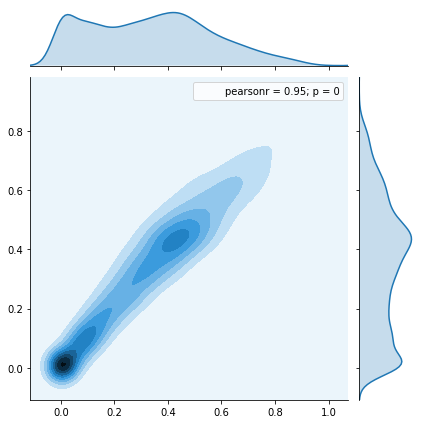

In [11]:
sns.jointplot(x=p_test.values[:10000], y=y_pred_test[:10000, 0], kind="kde")